# Hyperparameter Tuning Elapsed Time and Speedup Comparison

In [1]:
import pickle
import time

import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
def load_file(pkl_file_path):
    with open(pkl_file_path, 'rb') as file:
        loaded_data = pickle.load(file)
        return loaded_data

In [3]:
hpo_time_1 = load_file('res/hpo_time_1.pkl')
hpo_time_2 = load_file('res/hpo_time_2.pkl')
hpo_time_4 = load_file('res/hpo_time_4.pkl')
hpo_time_8 = load_file('res/hpo_time_8.pkl')

In [4]:
job_list = [1, 2, 4, 8]
time_list = [hpo_time_1, hpo_time_2, hpo_time_4, hpo_time_8]
speedup_list = [time_list[0]/time for time in time_list]

In [5]:
print(time_list)
print(speedup_list)

[1633.419298171997, 954.1966986656189, 591.6575014591217, 508.36329221725464]
[1.0, 1.7118266081366935, 2.760751438363791, 3.2130944998954356]


In [6]:
def plot_time_and_speedup(num_list, time_list, speedup_list) -> None:
    plt.figure(figsize=(12, 5.5))
    color = "tab:green"
    plt.subplot(1, 2, 1)
    plt.plot(num_list, time_list, marker="o", color=color, label="Elapsed Time")
    plt.title("Elapsed Time")
    plt.xlabel("Number of threads")
    plt.ylabel("Time (s)")
    plt.grid(True)
    plt.xticks(num_list, [int(n) for n in num_list])

    plt.subplot(1, 2, 2)
    plt.plot(num_list, speedup_list, marker="o", color=color, label="Speedup")
    plt.title("Speedup")
    plt.xlabel("Number of threads")
    plt.ylabel("Speedup")
    plt.grid(True)
    plt.xticks(num_list, [int(n) for n in num_list])
    plt.suptitle("Multi-thread Tuning Elapsed Time and Speedup", fontsize=14)

    plt.tight_layout()
    plt.gcf().set_dpi(600)
    plt.savefig(f"res/hpo_jobs_time_speedup.png", dpi=600)
    plt.show()

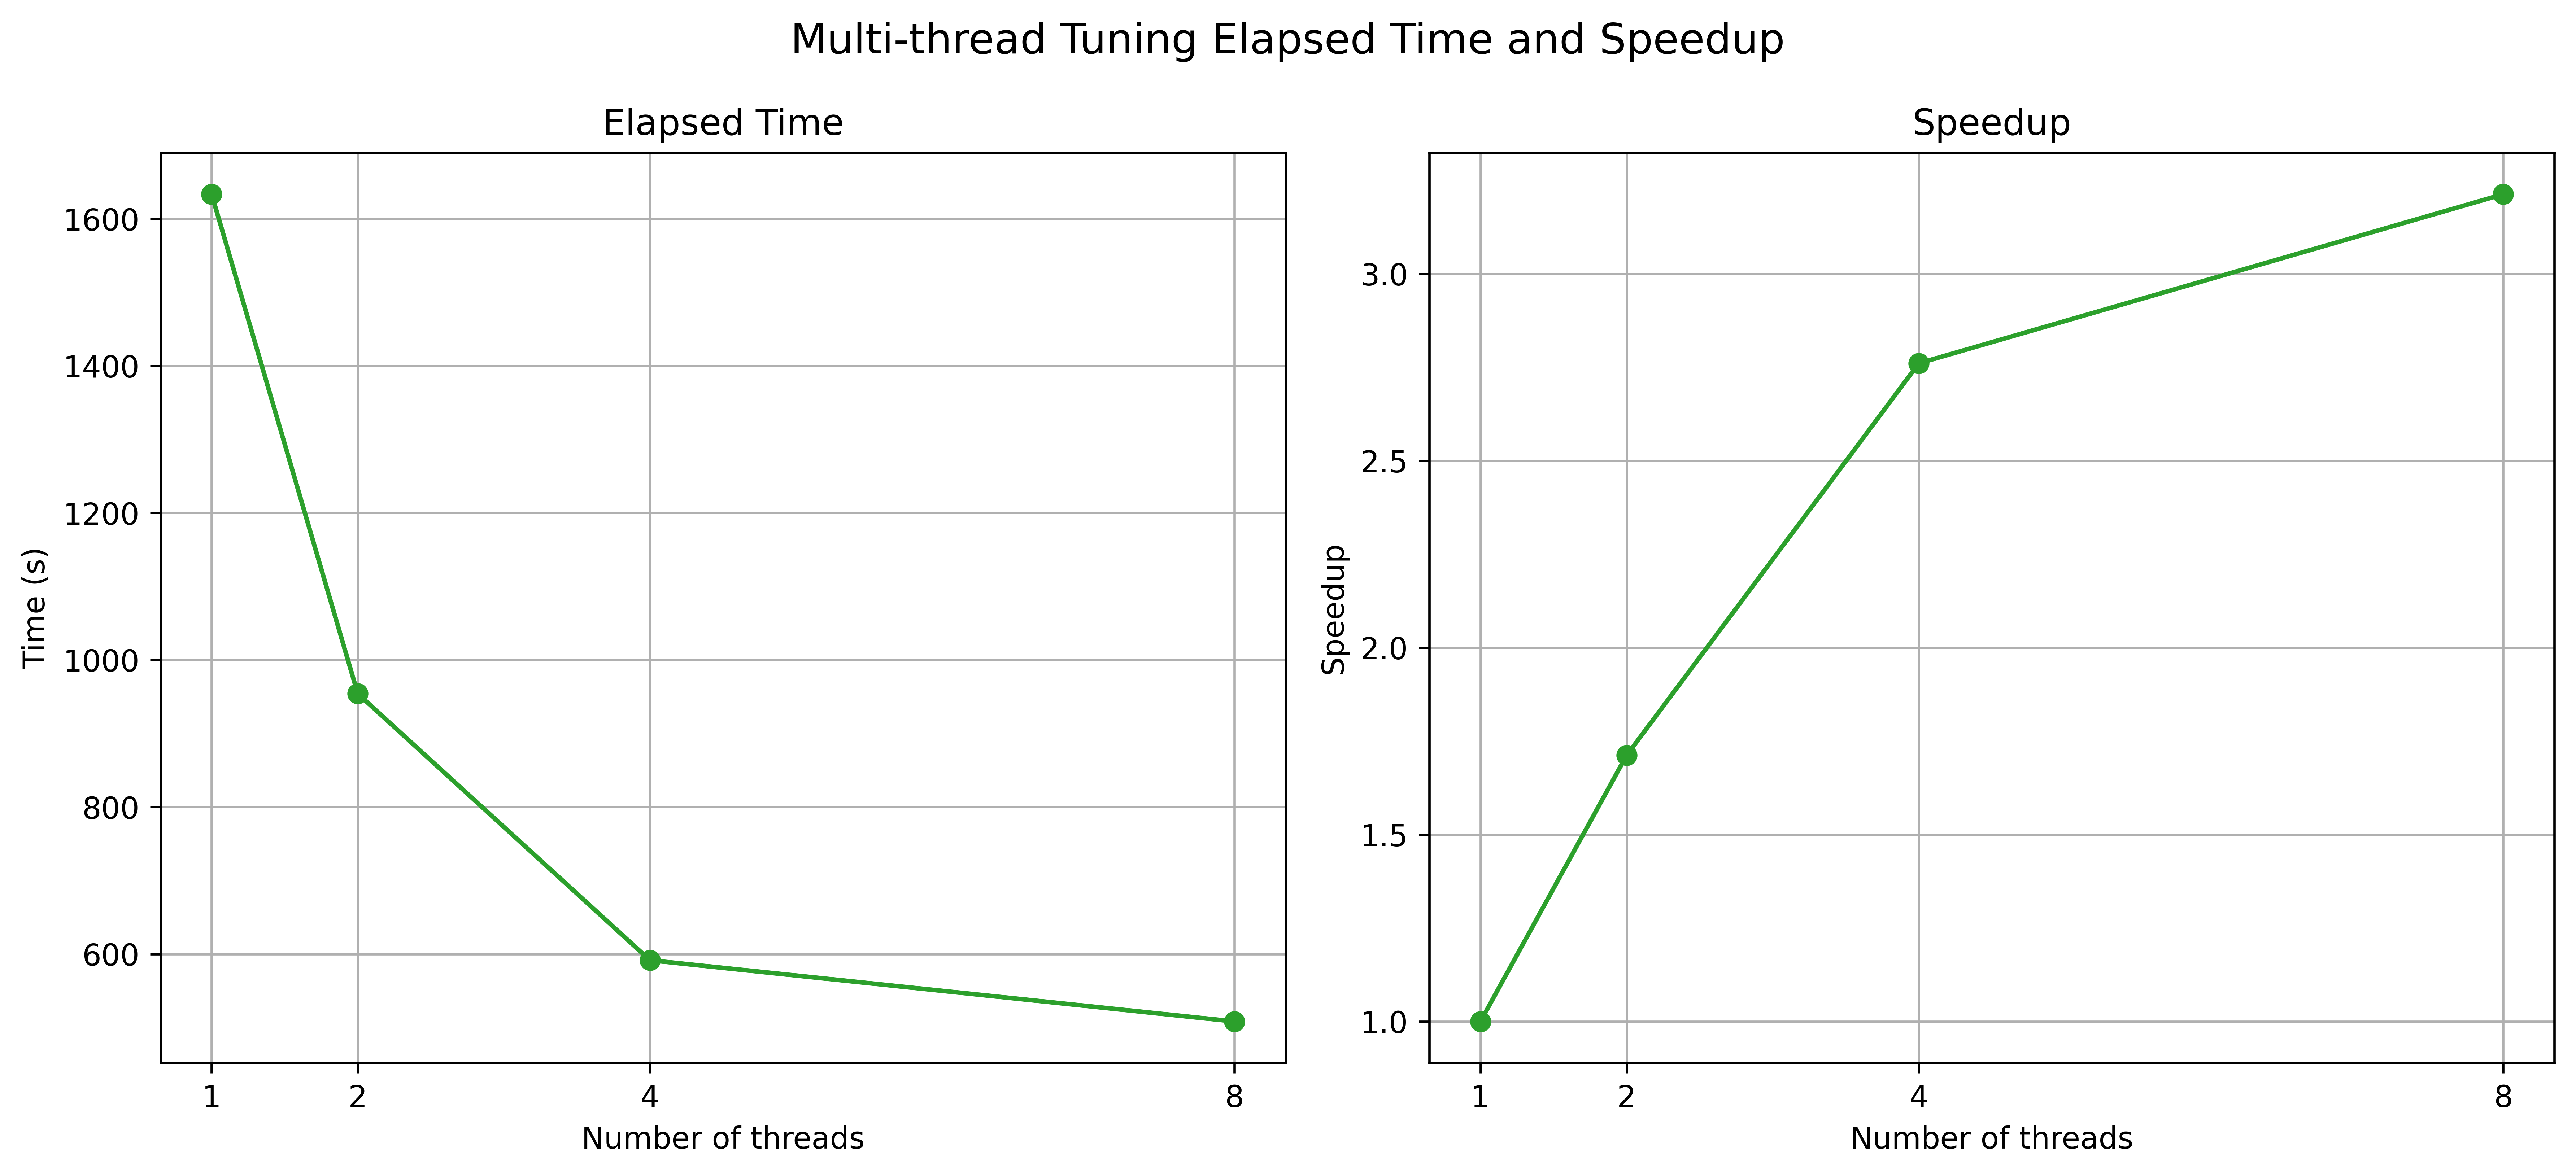

In [7]:
plot_time_and_speedup(job_list, time_list, speedup_list)